<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several factors describing the quality of white wine. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

Data citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection

from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [3]:
from sklearn.feature_selection import RFE


In [34]:
df_w=pd.read_csv('whitewine.csv',sep=';')
df_w.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000000,0.270000,0.360000,20.700000,0.045000,45.000000,170.000000,1.001000,3.000000,0.450000,8.800000,6
1,6.300000,0.300000,0.340000,1.600000,0.049000,14.000000,132.000000,0.994000,3.300000,0.490000,9.500000,6
2,8.100000,0.280000,0.400000,6.900000,0.050000,30.000000,97.000000,0.995100,3.260000,0.440000,10.100000,6
3,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6
4,7.200000,0.230000,0.320000,8.500000,0.058000,47.000000,186.000000,0.995600,3.190000,0.400000,9.900000,6


#### Load the first dataset and check the first two observations

In [5]:
# check data types of variables
df_w.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

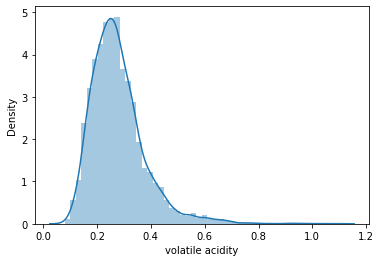

In [6]:
sns.distplot(df_w['volatile acidity'])

In [8]:
#yes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
d=np.log(df_w['residual sugar'])


In [8]:
d.skew()

-0.1611568975182972

In [9]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
r=pd.DataFrame(pt.fit_transform(df_w), columns=df_w.columns)
r.skew()


fixed acidity          -0.010802
volatile acidity        0.008625
citric acid            -0.074578
residual sugar          0.001397
chlorides              -0.066480
free sulfur dioxide     0.026995
total sulfur dioxide    0.021973
density                 0.345211
pH                     -0.003867
sulphates               0.010203
alcohol                 0.062252
quality                 0.009263
dtype: float64

In [10]:
r = pd.DataFrame(pt.fit_transform(df_w[['residual sugar']]))
r.skew()


0   0.001397
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df_w.var()

fixed acidity             0.712114
volatile acidity          0.010160
citric acid               0.014646
residual sugar           25.725770
chlorides                 0.000477
free sulfur dioxide     289.242720
total sulfur dioxide   1806.085491
density                   0.000009
pH                        0.022801
sulphates                 0.013025
alcohol                   1.514427
quality                   0.784356
dtype: float64

In [12]:
df_w['density'].unique()

array([1.001   , 0.994   , 0.9951  , 0.9956  , 0.9949  , 0.9938  ,
       0.9908  , 0.9947  , 0.992   , 0.9912  , 1.0002  , 0.9914  ,
       0.9928  , 0.9892  , 0.9917  , 0.9955  , 0.993   , 0.9937  ,
       0.9961  , 0.9906  , 0.9974  , 0.9934  , 0.9939  , 0.9962  ,
       0.9905  , 0.9999  , 0.9954  , 0.9931  , 0.995   , 0.991   ,
       0.9911  , 0.9972  , 0.9926  , 0.9927  , 0.9903  , 0.9958  ,
       0.9964  , 0.9941  , 0.9898  , 0.9929  , 0.9985  , 0.9946  ,
       0.9966  , 0.9975  , 0.9957  , 0.99    , 0.9899  , 0.9916  ,
       0.9969  , 0.9979  , 0.9913  , 0.997   , 1.      , 0.999   ,
       0.9959  , 0.9982  , 0.9968  , 0.9984  , 0.9952  , 0.9924  ,
       0.9923  , 0.9921  , 0.9918  , 0.9919  , 0.9894  , 0.998   ,
       0.9932  , 0.9896  , 0.9902  , 0.9936  , 0.9942  , 0.9973  ,
       0.9944  , 0.9989  , 0.9971  , 0.9998  , 0.9976  , 0.996   ,
       0.9935  , 0.9904  , 0.9996  , 0.9977  , 0.9965  , 0.9945  ,
       0.9915  , 0.9909  , 0.9988  , 0.9978  , 0.9933  , 0.994

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

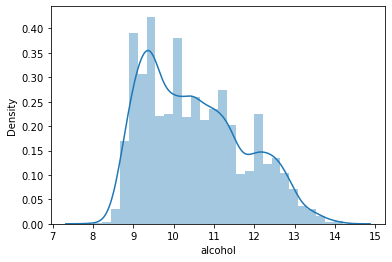

In [13]:
sns.distplot(df_w['alcohol'])

In [14]:
a=np.sqrt(df_w['alcohol'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

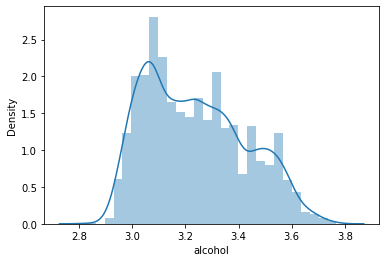

In [15]:
sns.distplot(a)

In [16]:
a.skew()

0.3978909427590142

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
X=df_w.drop('quality',axis=1)
y=df_w['quality']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:02:52   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
df_w['pH']=sc.fit_transform(df_w[['pH']])

In [20]:
X=df_w.drop('quality',axis=1)
y=df_w['quality']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:03:00   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.1036      0.016      6.513      0.000       0.072       0.135
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#after chengeing scaling there has no significance 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
VIF=pd.DataFrame()
X=df_w.iloc[:,:11]
VIF['features']=X.columns
VIF['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
print(VIF)

                features         VIF
0          fixed acidity   92.861483
1       volatile acidity    9.730569
2            citric acid   10.007114
3         residual sugar    3.830272
4              chlorides    6.497448
5    free sulfur dioxide    9.261556
6   total sulfur dioxide   24.980802
7                density 1056.497431
8                     pH  609.861725
9              sulphates   20.527123
10               alcohol  118.707368


In [40]:
X1=X.drop('density',axis=1)
VIF=pd.DataFrame()
VIF['features']=X1.columns
VIF['VIF']=[variance_inflation_factor(X1.values,i)for i in range(X1.shape[1])]
print(VIF)

               features        VIF
0         fixed acidity  58.337764
1      volatile acidity   9.683289
2           citric acid  10.002239
3        residual sugar   3.429412
4             chlorides   6.093775
5   free sulfur dioxide   9.210046
6  total sulfur dioxide  24.980442
7                    pH 160.145168
8             sulphates  20.526697
9               alcohol 103.478234


In [43]:
X2=X1.drop('pH',axis=1)
VIF=pd.DataFrame()
VIF['features']=X2.columns
VIF['VIF']=[variance_inflation_factor(X2.values,i)for i in range(X2.shape[1])]
print(VIF)

               features       VIF
0         fixed acidity 54.541049
1      volatile acidity  9.683068
2           citric acid  9.959726
3        residual sugar  3.367263
4             chlorides  5.680984
5   free sulfur dioxide  9.208379
6  total sulfur dioxide 23.263297
7             sulphates 18.965802
8               alcohol 45.630540


In [44]:
X3=X2.drop('fixed acidity',axis=1)
VIF=pd.DataFrame()
VIF['features']=X3.columns
VIF['VIF']=[variance_inflation_factor(X3.values,i)for i in range(X3.shape[1])]
print(VIF)

               features       VIF
0      volatile acidity  9.678151
1           citric acid  9.002814
2        residual sugar  3.240373
3             chlorides  5.526225
4   free sulfur dioxide  9.027919
5  total sulfur dioxide 21.661213
6             sulphates 18.777964
7               alcohol 25.796804


In [46]:
X4=X3.drop('total sulfur dioxide',axis=1)
VIF=pd.DataFrame()
VIF['features']=X4.columns
VIF['VIF']=[variance_inflation_factor(X4.values,i)for i in range(X4.shape[1])]
print(VIF)

              features       VIF
0     volatile acidity  9.079616
1          citric acid  8.846688
2       residual sugar  3.003763
3            chlorides  5.361558
4  free sulfur dioxide  5.806088
5            sulphates 17.571828
6              alcohol 25.784880


In [49]:
X5=X4.drop('sulphates',axis=1)
VIF=pd.DataFrame()
VIF['features']=X5.columns
VIF['VIF']=[variance_inflation_factor(X5.values,i)for i in range(X5.shape[1])]
print(VIF)

              features       VIF
0     volatile acidity  9.072566
1          citric acid  8.721978
2       residual sugar  2.982465
3            chlorides  5.234014
4  free sulfur dioxide  5.697062
5              alcohol 17.189370


In [50]:
X6=X5.drop('alcohol',axis=1)
VIF=pd.DataFrame()
VIF['features']=X6.columns
VIF['VIF']=[variance_inflation_factor(X6.values,i)for i in range(X6.shape[1])]
print(VIF)

              features      VIF
0     volatile acidity 5.346423
1          citric acid 6.150995
2       residual sugar 2.896183
3            chlorides 5.194186
4  free sulfur dioxide 5.157428


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
X=df_w.iloc[:,:11]
y=df_w['quality']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
residuals=model_2.resid
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:42:58   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
X=df_w.iloc[:,:11]
y=df_w['quality']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
residuals=model_2.resid
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:43:52   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
df_w['citric acid'].skew()

1.2819203981671066

In [56]:
df_w['citric acid']=np.sqrt(df_w['citric acid'])
df_w['citric acid'].skew()

-3.1333672607827756

In [57]:
X=df_w.iloc[:,:11]
y=df_w['quality']
X=sm.add_constant(X)
model_2=sm.OLS(y,X).fit()
residuals=model_2.resid
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     175.0
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        02:55:09   Log-Likelihood:                -5541.0
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.118e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  151.9915     18.772      8.097      0.000     115.190     188.793
fixed acidity            0.0593      0.021      2.835      0.005       0.018       0.100
volatile acidity        -1.7898      0.117    -15.329      0.000      -2.019      -1.561
citric acid              0.3354      0.142      2.365      0.018       0.057       0.613
residual sugar           0.0818      0.008     10.881      0.000       0.067       0.097
chlorides               -0.3648      0.546     -0.668      0.504      -1.435       0.705
free sulfur dioxide      0.0037      0.001      4.420      0.000       0.002       0.005
total sulfur dioxide    -0.0004      0.000     -0.932      0.352      -0.001       0.000
density               -152.2960     19.045     -7.997      0.000    -189.633    -114.959
pH                       0.7034      0.105      6.682      0.000       0.497       0.910
sulphates                0.6234      0.100      6.214      0.000       0.427       0.820
alcohol                  0.1880      0.024      7.757      0.000       0.140       0.235
==============================================================================
Omnibus:                      115.880   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.549
Skew:                           0.076   Prob(JB):                     1.95e-56
Kurtosis:                       4.111   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
X=df_w.iloc[:,:11]
X=sm.add_constant(X)
y=df_w['quality']
wine_model=sm.OLS(y,X).fit()

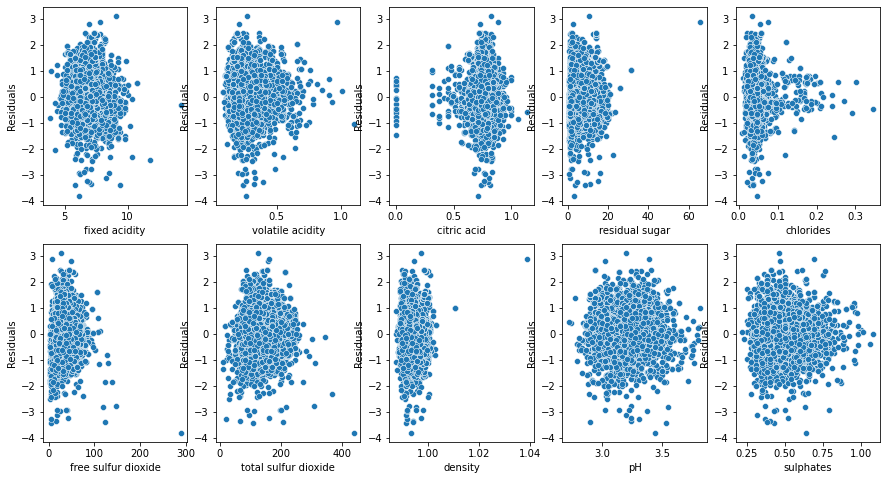

In [62]:
reseduals=wine_model.resid
fix, ax=plt.subplots(nrows=2,ncols=5,figsize=(15,8))
for variable,subplot in zip(X.columns[1:],ax.flatten()):
    z=sns.scatterplot(X[variable],reseduals,ax=subplot)
    z.set_ylabel('Residuals',fontsize=10)

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
x=df_w.iloc[:,:11]
y=df_w['quality']
x_train,x_test,y_tarin,y_test=train_test_split(x,y,test_size=2,random_state=10)
lr=LinearRegression()

In [64]:
l_for=sfs(estimator=lr,k_features=5,forward=True,verbose=2,scoring='r2')
sfs_for=l_for.fit(x_train,y_tarin)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:12:12] Features: 1/5 -- score: 0.09244684206882489[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:12:12] Features: 2/5 -- score: 0.17893369225253708[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-08-06 03:12:12] Features: 3/5 -- score: 0.22264917062910924[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [66]:
sfs_for.k_feature_names_

('fixed acidity', 'volatile acidity', 'residual sugar', 'density', 'pH')

In [67]:
sfs_for.k_score_

0.2547591546339485

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
ln_fr=sfs(estimator=lr,k_features=5,forward=False,verbose=2,scoring='r2')
sfs_back=ln_fr.fit(x_train,y_tarin)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:55:07] Features: 10/5 -- score: 0.27583841919032803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:55:07] Features: 9/5 -- score: 0.2763003372261185[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:55:07] Features: 8/5 -- score: 0.2763294459268302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [72]:
sfs_back.k_feature_names_

('volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol')

In [73]:
sfs_back.k_score_

0.26802412388092145

In [ ]:
#r2 score are quite increse forward selection r2 is 0.264 and backward ellimination 0.266


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [76]:
ln_fr1=sfs(estimator=lr,k_features=(2,6),forward=True,verbose=2,scoring='r2')
sfs_for1=ln_fr1.fit(x_train,y_tarin)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:56:58] Features: 1/6 -- score: 0.18747333410916894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:56:58] Features: 2/6 -- score: 0.23776974947798185[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:56:58] Features: 3/6 -- score: 0.2556286538815082[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [77]:
sfs_for1.k_feature_names_

('volatile acidity', 'residual sugar', 'density', 'pH', 'sulphates', 'alcohol')

In [78]:
sfs_for1.k_score_

0.2731814992521905

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
ln_fr2=sfs(estimator=lr,k_features='best',forward=True,verbose=2,scoring='r2')
sfs_fr2=ln_fr2.fit(x_train,y_tarin)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 03:58:08] Features: 1/11 -- score: 0.18747333410916894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 03:58:09] Features: 2/11 -- score: 0.23776974947798185[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 03:58:09] Features: 3/11 -- score: 0.2556286538815082[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [80]:
sfs_fr2.k_feature_names_

('volatile acidity',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [81]:
sfs_fr2.k_score_

0.2763294459268302

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [85]:
ln_fr2=sfs(estimator=lr,k_features='best',forward=False,verbose=2,scoring='r2')
sfs_bck1=ln_fr2.fit(x_train,y_tarin)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2021-08-06 04:01:48] Features: 10/1 -- score: 0.27583841919032803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2021-08-06 04:01:48] Features: 9/1 -- score: 0.2763003372261185[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-06 04:01:48] Features: 8/1 -- score: 0.2763294459268302[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [86]:
sfs_bck1.k_feature_names_

('volatile acidity',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol')

In [88]:
sfs_bck1.k_score_

0.2763294459268302

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
modl_rfe=RFE(estimator=lr,n_features_to_select=5)
model=modl_rfe.fit(x_train,y_tarin)

In [91]:
findex=pd.DataFrame(data=model.ranking_,index=x_train.columns)
findex

,0
fixed acidity,5
volatile acidity,1
citric acid,3
residual sugar,4
chlorides,1
free sulfur dioxide,6
total sulfur dioxide,7
density,1
pH,2
sulphates,1


In [96]:
x_train1= x_train[['volatile acidity','chlorides', 'density','sulphates','alcohol']]
lr.fit(x_train1, y_tarin)
r2=lr.score(x_train1, y_tarin)
print(r2)

0.2497877490305448


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
x =df_w.iloc[:,:11]
y =df_w['quality']
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.2, random_state=10)
lr=LinearRegression()

In [103]:
lin_for= sfs(estimator=lr, k_features=5, forward=True,scoring= 'r2')
sfs_for= lin_for.fit(x_train, y_train)

In [105]:
f=list(sfs_for.k_feature_names_)
X= X[f]
X_train1, X_test1, y_tarin1, y_test1= train_test_split(X,y,test_size=.2, random_state=10)

lr.fit(X_train1, y_train1)


LinearRegression()

In [107]:
ypred1=lr.predict(X_train1)
ypred2=lr.predict(X_test1)


In [109]:
mse1= mean_squared_error(y_train1, ypred1)
mse2= mean_squared_error(y_test1, ypred2)

print(mse1 , mse2)

0.5767545215693153 0.5688963831482611


In [ ]:
# i have from the q.10 we can say there is not much difference in the rmse so there is not such offerfiiting

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
New_pH=[]

for i in range(0, df_w.pH.shape[0]):
    if df_w.pH.iloc[i]==7:
        New_pH.append('N')
    elif df_w.pH.iloc[i]>7:
        New_pH.append('B')
    elif df_w.pH.iloc[i]<7:
        New_pH.append('A')

df_w['New_pH']= New_pH  


In [16]:
df_w.New_pH.value_counts()

A    4898
Name: New_pH, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [111]:
X=df_w.iloc[:,:11]
y=df_w['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
LR=LinearRegression()

In [112]:
score=cross_val_score(estimator=LR,X=X,y=y,cv=5,scoring='r2')

In [113]:
score.mean()

0.24727509163884548

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
X=df_w.iloc[:,:11]
y=df_w['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
LR=LinearRegression()

In [116]:
score=cross_val_score(estimator=LR,X=X,y=y,cv=5,scoring='r2')
score

array([0.20171614, 0.29711639, 0.27528225, 0.30511381, 0.15714687])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
l1=LeaveOneOut()
l1.get_n_splits(X)


4898

In [118]:
loocv_rmse = []
loocv = LeaveOneOut()
for train_index, test_index in loocv.split(X_train):
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
    y_train.iloc[train_index], y_train.iloc[test_index]
linreg = LinearRegression()
linreg.fit(X_train_l, y_train_l)
mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
rmse = np.sqrt(mse)
loocv_rmse.append(rmse)

In [119]:
np.mean(loocv_rmse)

0.15569483956952013